In [4]:
import linecache
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

from torchtext.data.utils import get_tokenizer
tokenizer = get_tokenizer("basic_english")

from torchtext.vocab import GloVe
embedding = GloVe(name = '840B', dim = 300)

### EDA

In [19]:
def load_data(filename):
    with open(f'dataset/dataset/{filename}.txt','r') as f:
        data = f.read().split('\n')
    return data

def unique_label(filename):
    unique_labels = set()
    labels = [review[9] for review in filename[:-1]]
    for label in labels:
        unique_labels.add(label)
    return unique_labels

def length_histogram(filename, text):
    string = [review[11:] for review in filename]
    length = [len(s.split(' ')) for s in string]
    plt.hist(length, density=True, bins=50)
    plt.xlabel(f'{text} length')
    plt.ylabel('frequency')

In [9]:
train = load_data('train')
test = load_data('test')

print(len(train))
print(len(test))

3600001
400001


In [15]:
print(unique_label(train))
print(unique_label(test))

{'2', '1'}
{'2', '1'}


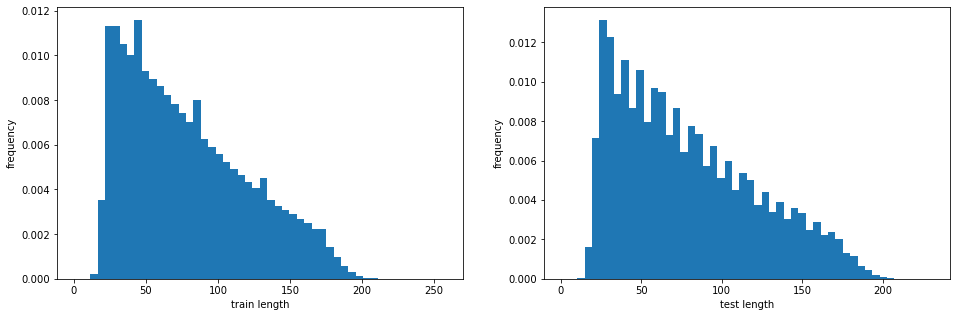

In [21]:
plt.figure(figsize = (16,5), dpi = 72)
plt.subplot(1, 2, 1)
length_histogram(train,'train')
plt.subplot(1, 2, 2)
length_histogram(test,'test')

### remove stopwords then convert to glove index

In [4]:
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 
'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 
'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 
'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 
'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 
'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 
'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 
'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 
'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 
'with', 'about', 'against', 'between', 'into', 'through', 'during', 
'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 
'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 
'once', 'here', 'there', 'when', 'where', 'why', 'how']

In [7]:
def text_to_vector(filename, outputname, length):
    # loop over each review then transform to vectors
    for idx in tqdm(range(length)):
        # get data
        line = linecache.getline(f'dataset/dataset/{filename}.txt', idx + 1).replace('\n','').lower()
        title, review = line[11:].split(': ',1)
        text = title + '. ' + review
        text = tokenizer(text)
        
        # blank vector sequence
        index_seq = [int(line[9])]
        
        for t in text:
            if t not in stopwords:
                try:
                    index_seq.append(int(embedding.stoi[t]))
                except:
                    pass

        with open(f'dataset/{outputname}.txt', 'a') as f:
            f.write(str(index_seq) + '\n')
    
text_to_vector('train','v_train',3600000)
text_to_vector('test','v_test',400000)

100%|█████████████████████████████████| 400000/400000 [02:03<00:00, 3247.10it/s]


### subset dataset

In [9]:
from tqdm import tqdm
import linecache
from random import uniform

def text_to_text(filename, length, output_size):
    idxs = [int(uniform(0,length)) for i in range(output_size)]
    for idx in tqdm(idxs):
        line = linecache.getline(f'dataset/dataset/{filename}.txt', idx + 1)
        vec = linecache.getline(f'dataset/dataset/v_{filename}.txt', idx + 1)
        with open(f'dataset/sample/{filename}.txt', 'a') as f:
            f.write(line)
        with open(f'dataset/sample/v_{filename}.txt', 'a') as f:
            f.write(vec)
    return idxs
train_idx = text_to_text('train', 3600000, 60000)
test_idx = text_to_text('test', 400000, 15000)

100%|██████████████████████████████████| 15000/15000 [00:00<00:00, 15713.74it/s]


In [11]:
print(sorted(train_idx))

[5, 17, 152, 186, 386, 397, 401, 660, 710, 752, 776, 861, 881, 934, 961, 1039, 1105, 1285, 1424, 1426, 1450, 1500, 1539, 1599, 1711, 1735, 1799, 1800, 1802, 1858, 2219, 2313, 2335, 2363, 2390, 2402, 2420, 2461, 2499, 2553, 2632, 2699, 2705, 2784, 2848, 3004, 3056, 3180, 3294, 3343, 3372, 3409, 3446, 3538, 3616, 3653, 3672, 3677, 3796, 3814, 4196, 4464, 4513, 4541, 4552, 4563, 4567, 4583, 4626, 4732, 4848, 4849, 4997, 5060, 5108, 5154, 5189, 5192, 5287, 5322, 5471, 5554, 5694, 5695, 5725, 5784, 5812, 5870, 5931, 5954, 5960, 5996, 6152, 6216, 6339, 6387, 6509, 6525, 6542, 6581, 6582, 6598, 6748, 6794, 6833, 6886, 6931, 6937, 7033, 7143, 7174, 7212, 7318, 7480, 7643, 7650, 7698, 7787, 7871, 7879, 8020, 8318, 8415, 8492, 8495, 8575, 8617, 8708, 8740, 8850, 8854, 8900, 8916, 8950, 8971, 9211, 9245, 9258, 9288, 9357, 9416, 9418, 9436, 9476, 9525, 9535, 9589, 9612, 9688, 9854, 9889, 10017, 10068, 10187, 10209, 10363, 10516, 10573, 10604, 10630, 10706, 10716, 10837, 10900, 11048, 11060, 11286,

In [12]:
print(sorted(test_idx))

[36, 42, 70, 72, 93, 112, 133, 159, 176, 188, 206, 228, 244, 268, 270, 304, 394, 425, 458, 502, 504, 516, 520, 527, 549, 611, 651, 717, 772, 848, 866, 964, 964, 991, 1042, 1042, 1089, 1101, 1129, 1139, 1149, 1151, 1168, 1205, 1258, 1302, 1353, 1387, 1394, 1447, 1490, 1511, 1517, 1572, 1589, 1655, 1668, 1674, 1708, 1734, 1739, 1756, 1765, 1767, 1819, 1832, 1849, 1873, 1895, 1900, 1953, 1953, 2032, 2077, 2078, 2129, 2137, 2143, 2180, 2219, 2233, 2245, 2270, 2326, 2331, 2344, 2349, 2400, 2421, 2471, 2536, 2563, 2569, 2574, 2627, 2637, 2642, 2663, 2674, 2678, 2698, 2726, 2734, 2783, 2790, 2865, 2884, 2887, 2951, 2978, 2997, 2999, 3136, 3140, 3152, 3179, 3183, 3220, 3239, 3353, 3353, 3372, 3382, 3389, 3400, 3409, 3409, 3445, 3476, 3504, 3518, 3583, 3585, 3613, 3613, 3624, 3637, 3646, 3670, 3687, 3723, 3787, 3819, 3824, 3838, 3906, 3917, 3930, 3943, 3953, 4032, 4050, 4101, 4108, 4128, 4196, 4235, 4244, 4247, 4255, 4269, 4373, 4377, 4408, 4424, 4428, 4440, 4443, 4475, 4489, 4552, 4578, 4588, 